In [5]:
import monkdata as m
from dtree import *
import dtree as d
import numpy as np

import random
def partition(data, fraction):
    ldata = list(data)
    random.shuffle(ldata)
    breakPoint = int(len(ldata) * fraction)
    return ldata[:breakPoint], ldata[breakPoint:]


In [12]:
var = []
var_all = []
mean = []

for j in range(1000):
    rate_correct = []
    monk1train, monk1val = partition(m.monk1, 0.3)
    t = d.buildTree(monk1train, m.attributes)

    # prunning, this return many different possibilities
    m_prun = allPruned(t)

    for i in range( len(m_prun) ):
       rate_correct.append(d.check(m_prun[i], monk1val))
    #print(rate_correct)
    
    mean.append( np.mean(rate_correct) ) # average of the all possibilities

    var_all = np.var(mean)  # this is the variance of each 4 rounds

    #print('one round')
    j +=1
mean_mean = np.mean(mean)    

In [13]:
print(mean_mean)
print(var_all)

0.6912430246318177
0.0028769362246478373


In [14]:
var = []
var_all = []
mean = []
mean_mean = []

for k in [0.3,0.4,0.5,0.6,0.7,0.8]:
    for j in range(20):
        rate_correct = []
        monk1train, monk1val = partition(m.monk3, k)
        t = d.buildTree(monk1train, m.attributes)

    # prunning, this return many different possibilities
        m_prun = allPruned(t)

        for i in range( len(m_prun) ):
          rate_correct.append(d.check(m_prun[i], monk1val))
        #print(rate_correct)
    
        mean.append( np.mean(rate_correct) ) # average of the all possibilities

        #print('one round')
        j +=1
    
    mean_mean.append( np.mean(mean) ) 
    var_all.append(np.var(mean))
print(mean_mean)


print(var_all)

[np.float64(0.7551970284237727), np.float64(0.7756697550956272), np.float64(0.790168301786916), np.float64(0.8005773377287984), np.float64(0.8084197673909357), np.float64(0.8133739431332502)]
[np.float64(0.0011727086692673383), np.float64(0.0016273971025284218), np.float64(0.001671124578504481), np.float64(0.0018660972084107743), np.float64(0.0020642154917913484), np.float64(0.0022847648297106287)]


In [15]:
mean_error = [1 - num for num in mean_mean]

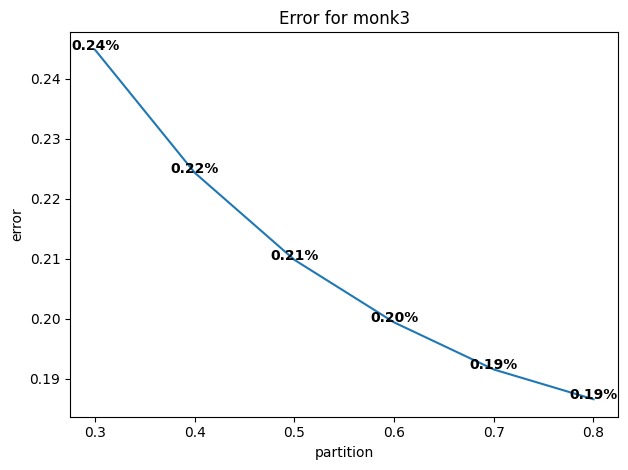

In [16]:
import matplotlib.pyplot as plt

# Sample data

x = ['0.3','0.4','0.5','0.6','0.7','0.8']
y1 = mean_error
y2 = var_all

# Create a plot
plt.plot(x, y1)

for i, v in enumerate(y1):
    plt.text(i, v , f"{v:.2f}%", ha='center', fontsize=10, fontweight='bold')

# Labels and title
plt.xlabel("partition")
plt.ylabel("error")
plt.title("Error for monk3")
plt.tight_layout()
# Show the plot

plt.savefig('mean_error_monk3.png')
plt.show()

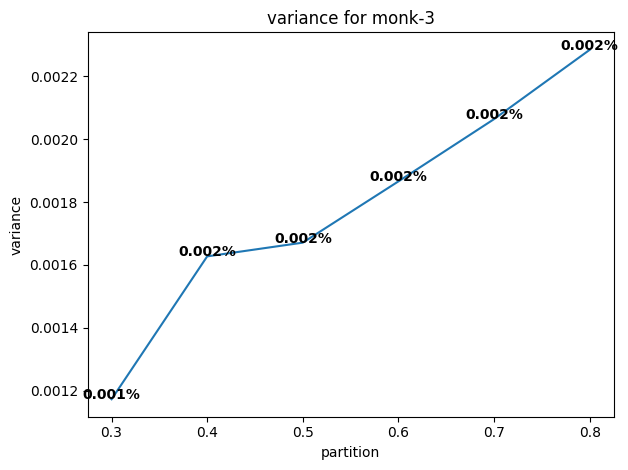

In [17]:
import matplotlib.pyplot as plt

# Sample data

x = ['0.3','0.4','0.5','0.6','0.7','0.8']
y1 = mean_mean
y2 = var_all

# Create a plot
plt.plot(x, y2)

for i, v in enumerate(y2):
    plt.text(i, v , f"{v:.3f}%", ha='center', fontsize=10, fontweight='bold')

# Labels and title\
plt.xlabel("partition")
plt.ylabel("variance")
plt.title("variance for monk-3")
plt.tight_layout()
# Show the plot

plt.savefig('variance_monk3.png')

plt.show()